# Testing Downsampling
This code explores downsampling and rendering boxes.  Here, an image has already been downsized by a factor of 2.  We plot the original image with bounding boxes of cars as well as the downsized image with car bounding boxes to test our work.

Finally we visualize all 5 GDAL downsampling methods next to the original image for comparison.

In [9]:
# import statements for json parsing
import os
import json_annotation_utilities as jutil

# for font formatting consistent with dissertation style
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

# imports for rendering
import data_utilities.aug_util as aug
import data_utilities.wv_util as wv
import matplotlib.pyplot as plt
import numpy as np
import csv
%matplotlib inline

# path to data
path_to_data = '../data/'
car_truth = 'test_util_justcars.geojson'#'justcars.geojson'
half_car_truth = 'test_util_justcars_half.geojson'#"justcars_half.geojson"


In [10]:
# Setup for JSON - this cell should only execute once

# extract all cars to separate JSON, if that doesn't exist
if not os.path.isfile(os.path.join(path_to_data,"justcars.geojson")):
    jutil.parsetype(os.path.join(path_to_data,"xView_train.geojson"),
                    os.path.join(path_to_data,"justcars.geojson"))
    
# downsample all cars JSON, if that doesn't exist yet
label_path = os.path.join(path_to_data, car_truth)
if not os.path.isfile(label_path):
    jutil.downsample_bbox(os.path.join(path_to_data,"justcars.geojson"), label_path)

In [11]:
# function to create plottable image with box ontop of image
def plot_boxes(chip_name = '104.tif', modified_chip_name = '104_halved_default.tif', 
               label_path = label_path, chip_shape = 500,
               path_to_data = path_to_data, ind = 0):
    '''
    Plots boxes on top of images.
    
    Returns PIL.Image.Image of bounding boxes on images
    
    Note: set modified_chip_name = chip name for 
    '''
    
    arr = wv.get_image(path_to_data + modified_chip_name)
    
    #Loading our labels
    coords, chips, classes = wv.get_labels(label_path)
    #We only want to coordinates and classes that are within our chip
    coords = coords[chips==chip_name]
    classes = classes[chips==chip_name].astype(np.int64)
    
    #We can chip the image into chips (be sure to halve/double depending on image size)
    c_img, c_box, c_cls = wv.chip_image(img = arr, coords= coords, 
                                        classes=classes, shape=(chip_shape, chip_shape))
    
    labelled = aug.draw_bboxes(c_img[ind],c_box[ind])
    
    return labelled

## Side by Side Comparison

In [15]:
# Create Plots
labelled = plot_boxes(chip_name = '104.tif', modified_chip_name = '104.tif', chip_shape = 300,
                     label_path = path_to_data + car_truth)

labelled_2 = plot_boxes(modified_chip_name = "104_halved_default.tif", chip_shape = 150,
                       label_path = path_to_data + half_car_truth)

100%|██████████| 211664/211664 [00:01<00:00, 146312.12it/s]


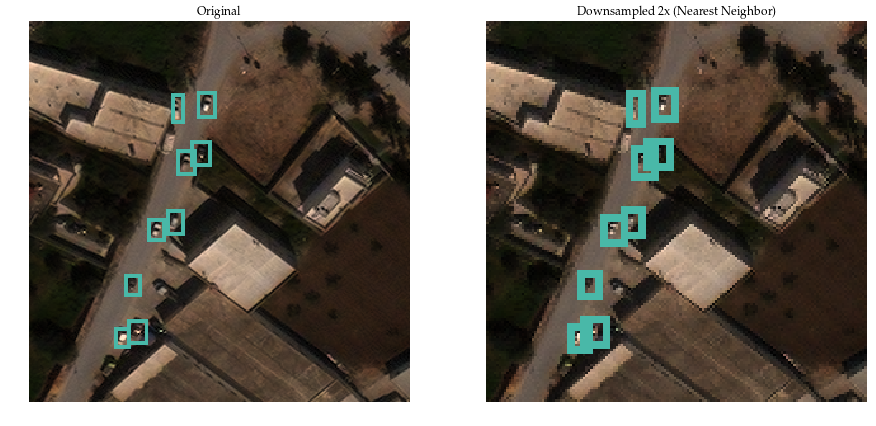

In [16]:
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.axis('off')
plt.title('Original')
plt.imshow(labelled)
plt.subplot(122)
plt.axis('off')
plt.title('Downsampled 2x (Nearest Neighbor)')
plt.imshow(labelled_2)

## Comparison of All

100%|██████████| 211664/211664 [00:01<00:00, 146094.96it/s]


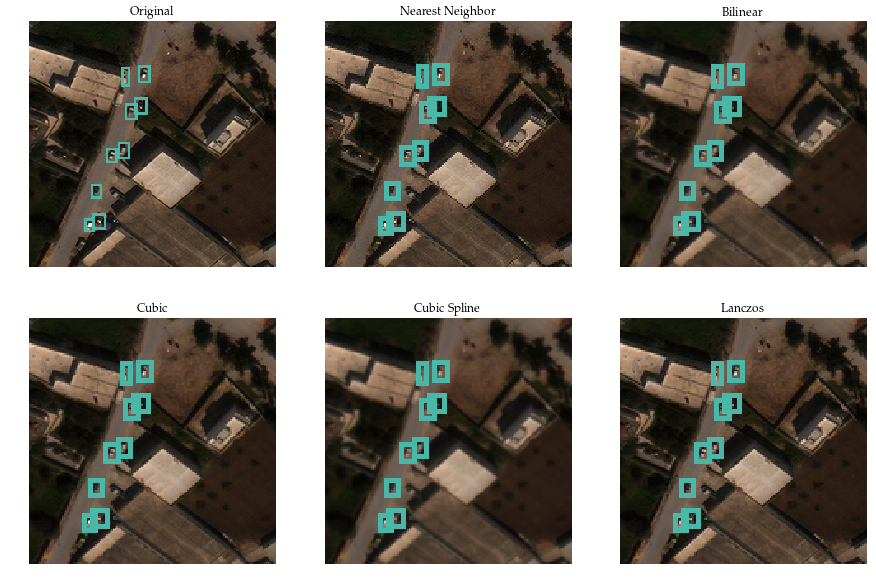

In [18]:
images = ["104_halved_default.tif", "104_halved_bilinear.tif", "104_halved_cubic.tif",
          "104_halved_cubicspline.tif", "104_halved_lanczos.tif"]

lab = ['Nearest Neighbor', 'Bilinear', 'Cubic', 'Cubic Spline', 'Lanczos']

plt.figure(figsize=(15,10))
plt.subplot(231)
plt.axis('off')
plt.title('Original')
plt.imshow(plot_boxes(chip_name = '104.tif', modified_chip_name = '104.tif', chip_shape = 300,
                     label_path = path_to_data + car_truth, ))
# plot all others
for i in range(len(images)):
    plotnum = 232 + i
    plt.subplot(plotnum)
    plt.axis('off')
    plt.title(lab[i])
    plt.imshow(plot_boxes(modified_chip_name = images[i], chip_shape = 150, 
                          label_path = path_to_data + half_car_truth))